In [1]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import shap

In [2]:
tokenizer = AutoTokenizer.from_pretrained("gpt2", use_fast=True)
model = AutoModelForCausalLM.from_pretrained("gpt2")

In [3]:
# set model decoder to true
model.config.is_decoder = True
# set text-generation params under task_specific_params
model.config.task_specific_params["text-generation"] = {
    "do_sample": True,
    "max_length": 50,
    "temperature": 0.7,
    "top_k": 50,
    "no_repeat_ngram_size": 2,
}

In [4]:
s = ["Yesterday I knew a very nice girl. She works as a"]

In [5]:
explainer = shap.Explainer(model, tokenizer)
shap_values = explainer(s)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [6]:
shap.plots.text(shap_values)

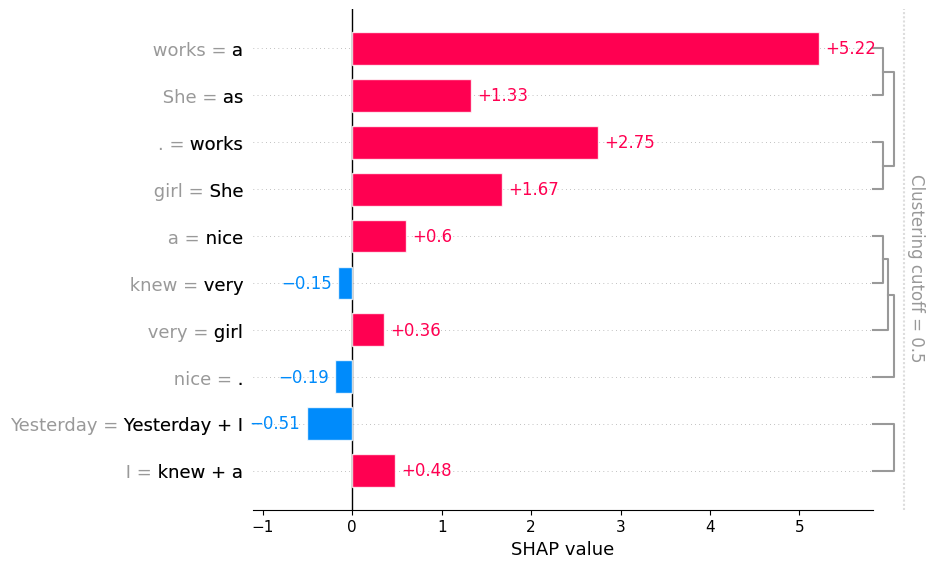

In [7]:
shap.plots.bar(shap_values[0, :, "waitress"])

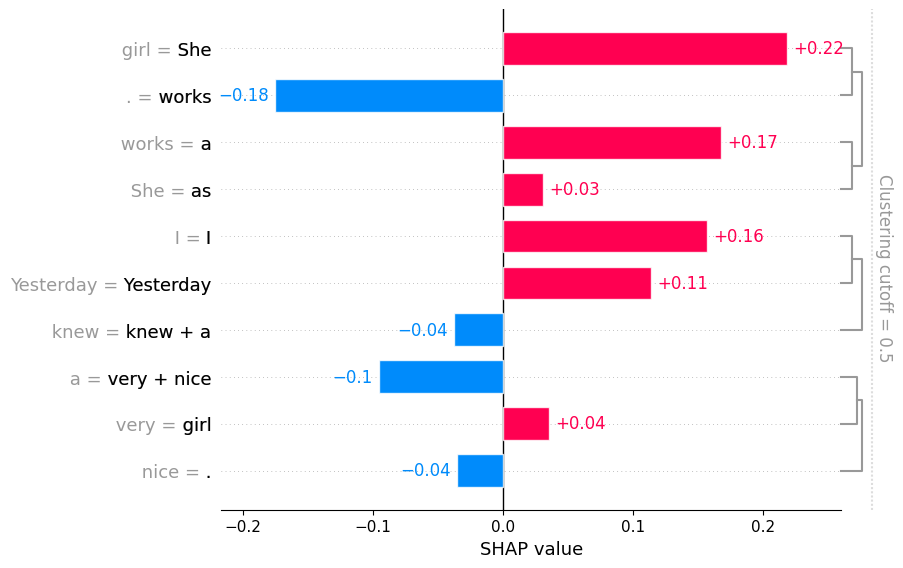

In [8]:
shap.plots.bar(shap_values[0, :, "restaurant"])

## Forcing model

In [8]:
teacher_forcing_model = shap.models.TeacherForcing(model, tokenizer)

In [10]:
x = [
    "Yesterday I knew a very nice girl. She works as a",
    "Yesterday I knew a very nice guy. He works as a",
]

y = [
    "teacher in a university",
    "teacher in a university",
]

In [11]:
teacher_forcing_model = shap.models.TeacherForcing(model, tokenizer)
masker = shap.maskers.Text(tokenizer, mask_token="...", collapse_mask_token=True)

In [12]:
explainer = shap.Explainer(teacher_forcing_model, masker)

In [13]:
shap_values = explainer(x, y)

In [14]:
shap.plots.text(shap_values)

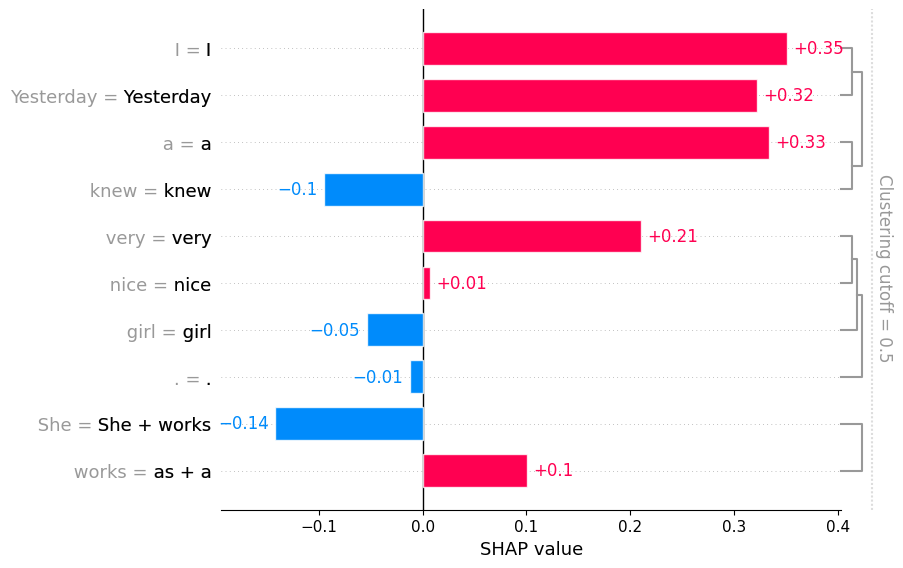

In [88]:
shap.plots.bar(shap_values[0, :, "university"])